# Predicting Credit Card Approvals

In [ ]:
In this mini-project ill build a classification model that can accuratly classify whether a credit card application will be approved or not

## Import & Functions

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# The Data

## Data Set Information:

- Each row contains a credit card application.
- The last feature is a binary variable that indicate whether the application was approved or not.
- All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

In [214]:
df = pd.read_csv('crx(1).data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Exploratory Analysis

### EDA1 - Data Types

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


### Tasks:
1. Check if Feature number 1 should be an object or a numerical data type
2. Change Feature number 15 to 0 and 1 intead of + and -

#### Task 1

In [216]:
feature1 = df.iloc[:,1]

In [217]:
feature1.value_counts().head(20)

?        12
22.67     9
20.42     7
23.58     6
19.17     6
20.67     6
25.00     6
18.83     6
24.50     6
22.50     6
27.67     5
27.83     5
33.17     5
23.25     5
23.00     5
23.08     5
24.58     4
34.17     4
26.17     4
29.50     4
Name: 1, dtype: int64

#### Notes:
- There arent a lot of unique values in feature 1, Therefore feature 1 will remain an object data type.

#### Task 2

In [218]:
feature15 = df.iloc[:, 15]
feature15 = feature15.replace({'+':1, '-':0})
df.iloc[:, 15] = feature15

In [219]:
feature15 = df.iloc[:, 15].values
assert 1 in feature15  
assert 0 in feature15

### EDA2 - Missing Values

- Looks like some of the features has a '?' sign instead of an actual value.
- First ill replace all of them with a 'NaN' values to represent a missing value.
- Now Lets replace all of these 'NaN' values with a mean value for the numerical features and a most frequent value for the categorical.


### Replacing ? with NaN

In [220]:
features_list = df.columns

for feature in features_list:
    if '?' in df.iloc[:, feature].values:
        df.iloc[:, feature] = df.iloc[:, feature].replace({'?':np.nan})

<ipython-input-220-f86f8cc69e5f>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '?' in df.iloc[:, feature].values:


In [221]:
assert df.isna().sum().any() > 0 

In [222]:
# Extracting the numerical features
numerical_features = []
features_list = df.columns
for feature in features_list:
    
    if df[feature].dtype == 'float64':
        numerical_features.append(feature)
        
    if df[feature].dtype == 'int64':
        numerical_features.append(feature)
        
# Extracting the categorical features
categorical_features = []
for feature in features_list:
    
    if df[feature].dtype == 'object':
        categorical_features.append(feature)

In [223]:
numerical_df = df.iloc[:, numerical_features]
numerical_df.head()

,2,7,10,14,15
0,0.000,1.25,1,0,1
1,4.460,3.04,6,560,1
2,0.500,1.50,0,824,1
3,1.540,3.75,5,3,1
4,5.625,1.71,0,0,1


In [224]:
categorical_df = df.iloc[:, categorical_features]
categorical_df.head()

,0,1,3,4,5,6,8,9,11,12,13
0,b,30.83,u,g,w,v,t,t,f,g,00202
1,a,58.67,u,g,q,h,t,t,f,g,00043
2,a,24.50,u,g,q,h,t,f,f,g,00280
3,b,27.83,u,g,w,v,t,t,t,g,00100
4,b,20.17,u,g,w,v,t,f,f,s,00120


### Mean Imputing for Numerical Features

In [225]:
from sklearn.impute import SimpleImputer

In [226]:
mean_imputer = SimpleImputer(strategy = 'mean')
numerical_df = mean_imputer.fit_transform(numerical_df)

### Most_frequent Imputing for Categorical Features

In [227]:
most_frequent_imputer = SimpleImputer(strategy = 'most_frequent')
categorical_df = most_frequent_imputer.fit_transform(categorical_df)

### Assert Check

In [228]:
assert df.isna().sum().any() == 0

AssertionError: 

In [229]:
df.iloc[:, numerical_features] = numerical_df
df.iloc[:, categorical_features] = categorical_df

In [230]:
# Assert Check
assert df.isna().sum().any() == 0

### Pre-Processing

##### Spliting to x and y variables

In [231]:
y = df.iloc[:,-1].values
x = df.drop(len(df.columns)-1, axis = 1).values

##### Encoding categorical values to numerical

In [232]:
from sklearn.preprocessing import LabelEncoder

In [235]:
for feature in categorical_features:
    encoder = LabelEncoder()
    x[:, feature] = encoder.fit_transform(x[:, feature])

##### Splitting dataset to train/test

In [242]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 365)

##### Scailing

In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Building the Model

1. Logistic Regression

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [308]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [309]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       105
         1.0       0.85      0.85      0.85       102

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



In [310]:
print(confusion_matrix(y_test, predictions))

[[90 15]
 [15 87]]


In [311]:
cv_scores = cross_val_score(model, x_test, y_test, cv=5, scoring='roc_auc')
cv_scores.mean()

0.8908843537414967

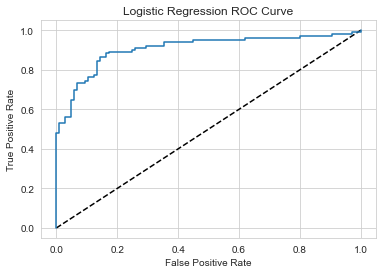

In [312]:
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

2. RandomForest

In [313]:
from sklearn.ensemble import RandomForestClassifier

In [314]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [315]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       105
         1.0       0.88      0.81      0.85       102

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.85       207
weighted avg       0.86      0.86      0.85       207



In [316]:
print(confusion_matrix(y_test, predictions))

[[94 11]
 [19 83]]


In [317]:
cv_scores = cross_val_score(model, x_test, y_test, cv=5, scoring='roc_auc')
cv_scores.mean()

0.9168027210884354

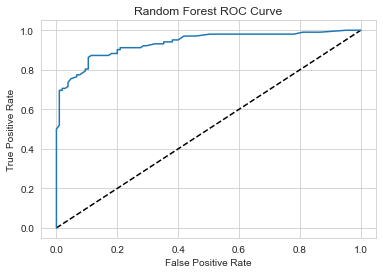

In [318]:
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show();

- The model with highest score is the Random Forest Classifier